# Analysis of the Lyrics of Joy Division & New Order 1979-2013
- TKTKTK

![](../content/images/table_albums_static.png)

### Imports
- These are general imports only.
- Libraries needed for specialized sections will call in the necessary import at the top notebook cell in that section.

In [1]:
# Data access
import sqlite3

# Data manipulation
import pandas as pd
import numpy as np

# ... and regex
import regex as re

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Prevent future/deprecation warnings from showing in output
import warnings
warnings.filterwarnings(action='ignore')

### Connect to Song Data

In [2]:
conn = sqlite3.connect('../lyrics/data/no.sqlite')
query = "SELECT * FROM no O INNER JOIN no_songs S on S.fk_id = O.id ORDER BY id;"

In [3]:
df = pd.read_sql_query(query, conn)

### Perform DataFrame Munging/Data Manipulation

In [4]:
# Drop bracketed terms - E.g. [Verse n]; [Intro]; [Outro]; [Hook]
df.replace(to_replace=[r"\[\w*.?.\]"], value=[" "], regex = True, inplace = True)

In [5]:
# Split lyrics data into 1 row per lyrics line
def proc_col_split(df, col):
    colc = df[col].str.split('\n')
    clst = colc.values.tolist()
    lens = [len(l) for l in clst]

    cdf = pd.DataFrame({col: np.concatenate(clst)}, df.index.repeat(lens))
    return df.drop(col, 1).join(cdf).reset_index(drop=True)

# Credit: [Python - How to split cell in a column to a new row…](http://bit.ly/2x6JE2K)

In [6]:
df_tmp = proc_col_split(df, 'song_lyrics')

In [7]:
# Needed Fix: 
# Return index position of empty `song_lyrics` rows caused by the split
indexNames = df_tmp[df_tmp.song_lyrics == ' '].index

# Delete by row indexes from DataFrame
df_tmp.drop(indexNames , inplace = True)

In [8]:
# Create some metrics
word_counts = []
unique_word_counts = []
for i in range (0, df_tmp.shape[0]):
    word_counts.append(len(df_tmp.iloc[i]['song_lyrics'].split()))
    unique_word_counts.append(len(set(df_tmp.iloc[i]['song_lyrics'].split())))
df_tmp['song_lyric_len'] = word_counts
df_tmp['song_lyric_unq'] = unique_word_counts

In [9]:
# Check progress
df_tmp.iloc[5:10]

,id,artist_name,name,full_title,cover_art_url,release_date,artist_url,url,fk_id,song_id,song_title,song_desc,song_lyrics,song_lyric_len,song_lyric_unq
6,27143,Joy Division,Unknown Pleasures,Unknown Pleasures by Joy Division,https://images.genius.com/7f3937bd3ecb4d980757...,"June 15, 1979",https://genius.com/artists/Joy-division,https://genius.com/albums/Joy-division/Unknown...,27143,111130,Disorder,“Disorder” kicks things off with drummer Steph...,Leave them for another day,5,5
7,27143,Joy Division,Unknown Pleasures,Unknown Pleasures by Joy Division,https://images.genius.com/7f3937bd3ecb4d980757...,"June 15, 1979",https://genius.com/artists/Joy-division,https://genius.com/albums/Joy-division/Unknown...,27143,111130,Disorder,“Disorder” kicks things off with drummer Steph...,"I've got the spirit, lose the feeling",7,6
8,27143,Joy Division,Unknown Pleasures,Unknown Pleasures by Joy Division,https://images.genius.com/7f3937bd3ecb4d980757...,"June 15, 1979",https://genius.com/artists/Joy-division,https://genius.com/albums/Joy-division/Unknown...,27143,111130,Disorder,“Disorder” kicks things off with drummer Steph...,Take the shock away,4,4
9,27143,Joy Division,Unknown Pleasures,Unknown Pleasures by Joy Division,https://images.genius.com/7f3937bd3ecb4d980757...,"June 15, 1979",https://genius.com/artists/Joy-division,https://genius.com/albums/Joy-division/Unknown...,27143,111130,Disorder,“Disorder” kicks things off with drummer Steph...,,0,0
11,27143,Joy Division,Unknown Pleasures,Unknown Pleasures by Joy Division,https://images.genius.com/7f3937bd3ecb4d980757...,"June 15, 1979",https://genius.com/artists/Joy-division,https://genius.com/albums/Joy-division/Unknown...,27143,111130,Disorder,“Disorder” kicks things off with drummer Steph...,"It's getting faster, moving faster",5,5


In [10]:
# Needed Fix: 
# `song_lyrics` length == 0 persists?
indexNames = df_tmp[df_tmp.song_lyric_len <= 1].index

# Delete by row indexes from DataFrame
df_tmp.drop(indexNames , inplace = True)

In [11]:
df_tmp['name'].value_counts()

Waiting for the Siren's Call    432
Get Ready                       373
Republic                        316
Unknown Pleasures               281
Brotherhood                     248
Lost Sirens                     246
Technique                       242
Low-Life                        232
Closer                          214
Power, Corruption and Lies      205
Movement                        141
Name: name, dtype: int64

In [12]:
df_tmp.reset_index(inplace = True)

In [13]:
# Check
df_tmp.iloc[5:10]

,index,id,artist_name,name,full_title,cover_art_url,release_date,artist_url,url,fk_id,song_id,song_title,song_desc,song_lyrics,song_lyric_len,song_lyric_unq
5,6,27143,Joy Division,Unknown Pleasures,Unknown Pleasures by Joy Division,https://images.genius.com/7f3937bd3ecb4d980757...,"June 15, 1979",https://genius.com/artists/Joy-division,https://genius.com/albums/Joy-division/Unknown...,27143,111130,Disorder,“Disorder” kicks things off with drummer Steph...,Leave them for another day,5,5
6,7,27143,Joy Division,Unknown Pleasures,Unknown Pleasures by Joy Division,https://images.genius.com/7f3937bd3ecb4d980757...,"June 15, 1979",https://genius.com/artists/Joy-division,https://genius.com/albums/Joy-division/Unknown...,27143,111130,Disorder,“Disorder” kicks things off with drummer Steph...,"I've got the spirit, lose the feeling",7,6
7,8,27143,Joy Division,Unknown Pleasures,Unknown Pleasures by Joy Division,https://images.genius.com/7f3937bd3ecb4d980757...,"June 15, 1979",https://genius.com/artists/Joy-division,https://genius.com/albums/Joy-division/Unknown...,27143,111130,Disorder,“Disorder” kicks things off with drummer Steph...,Take the shock away,4,4
8,11,27143,Joy Division,Unknown Pleasures,Unknown Pleasures by Joy Division,https://images.genius.com/7f3937bd3ecb4d980757...,"June 15, 1979",https://genius.com/artists/Joy-division,https://genius.com/albums/Joy-division/Unknown...,27143,111130,Disorder,“Disorder” kicks things off with drummer Steph...,"It's getting faster, moving faster",5,5
9,12,27143,Joy Division,Unknown Pleasures,Unknown Pleasures by Joy Division,https://images.genius.com/7f3937bd3ecb4d980757...,"June 15, 1979",https://genius.com/artists/Joy-division,https://genius.com/albums/Joy-division/Unknown...,27143,111130,Disorder,“Disorder” kicks things off with drummer Steph...,Now it's getting out of hand,6,6


### Modify the DataFrame with Natural Language Processing (NLP) features

In [14]:
# [spaCY](https://spacy.io/) calls itself "Industrial-strength NLP in Python"
import spacy
# ! python -m spacy download en_core_web_sm

In [15]:
def proc_lyric_corpus(dataset, lyric):
    verbs = []
    nouns = []
    adverbs = []
    corpus = []
    nlp = spacy.load('en_core_web_sm')

    for i in range (0, len(dataset)):
        print("Processing record {} of {}".format(i+1, len(dataset)), end = "\r")
        song = dataset.iloc[i][lyric]
        doc = nlp(song)
        df_corpus = pd.DataFrame()
        for token in doc:
            if token.lemma_ == "-PRON-": # Pronoun detection
                    lemma = token.text
            else:
                lemma = token.lemma_
            row = {
                "Word": token.text,
                "Lemma": lemma,
                "PoS": token.pos_,
                "Stop Word": token.is_stop
            }
            df_corpus = df_corpus.append(row, ignore_index = True)
        verbs.append(" ".join(df_corpus["Lemma"][df_corpus["PoS"] == "VERB"].values).lower())
        nouns.append(" ".join(df_corpus["Lemma"][df_corpus["PoS"] == "NOUN"].values).lower())
        adverbs.append(" ".join(df_corpus["Lemma"][df_corpus["PoS"] == "ADV"].values).lower())
        corpus_clean = " ".join(df_corpus["Lemma"][df_corpus["Stop Word"] == False].values)
        corpus_clean = re.sub(r'[^A-Za-z0-9]+', ' ', corpus_clean)   
        corpus.append(corpus_clean.lower())
    dataset['verbs'] = verbs
    dataset['nouns'] = nouns
    dataset['adverbs'] = adverbs
    dataset['corpus'] = corpus
    return dataset

# Credit: [Drake Using NLP](http://bit.ly/2IAGrLt)
# Also Credit: [Extractive Text Summarization Using spaCy in Python](http://bit.ly/2VZsSwT)

In [16]:
data = proc_lyric_corpus(df_tmp, 'song_lyrics')

In [17]:
data.shape

(2930, 20)

In [18]:
# Check
data.head()

,index,id,artist_name,name,full_title,cover_art_url,release_date,artist_url,url,fk_id,song_id,song_title,song_desc,song_lyrics,song_lyric_len,song_lyric_unq,verbs,nouns,adverbs,corpus
0,1,27143,Joy Division,Unknown Pleasures,Unknown Pleasures by Joy Division,https://images.genius.com/7f3937bd3ecb4d980757...,"June 15, 1979",https://genius.com/artists/Joy-division,https://genius.com/albums/Joy-division/Unknown...,27143,111130,Disorder,“Disorder” kicks things off with drummer Steph...,I've been waiting for a guide,6,6,wait,guide,,wait guide
1,2,27143,Joy Division,Unknown Pleasures,Unknown Pleasures by Joy Division,https://images.genius.com/7f3937bd3ecb4d980757...,"June 15, 1979",https://genius.com/artists/Joy-division,https://genius.com/albums/Joy-division/Unknown...,27143,111130,Disorder,“Disorder” kicks things off with drummer Steph...,To come and take me by the hand,8,8,come take,hand,,come hand
2,3,27143,Joy Division,Unknown Pleasures,Unknown Pleasures by Joy Division,https://images.genius.com/7f3937bd3ecb4d980757...,"June 15, 1979",https://genius.com/artists/Joy-division,https://genius.com/albums/Joy-division/Unknown...,27143,111130,Disorder,“Disorder” kicks things off with drummer Steph...,Could these sensations make me feel,6,6,could make feel,sensation,,sensation feel
3,4,27143,Joy Division,Unknown Pleasures,Unknown Pleasures by Joy Division,https://images.genius.com/7f3937bd3ecb4d980757...,"June 15, 1979",https://genius.com/artists/Joy-division,https://genius.com/albums/Joy-division/Unknown...,27143,111130,Disorder,“Disorder” kicks things off with drummer Steph...,The pleasures of a normal man?,6,6,,pleasure man,,pleasure normal man
4,5,27143,Joy Division,Unknown Pleasures,Unknown Pleasures by Joy Division,https://images.genius.com/7f3937bd3ecb4d980757...,"June 15, 1979",https://genius.com/artists/Joy-division,https://genius.com/albums/Joy-division/Unknown...,27143,111130,Disorder,“Disorder” kicks things off with drummer Steph...,"Lose sensation, spare the insults",5,5,lose spare,sensation insult,,lose sensation spare insult


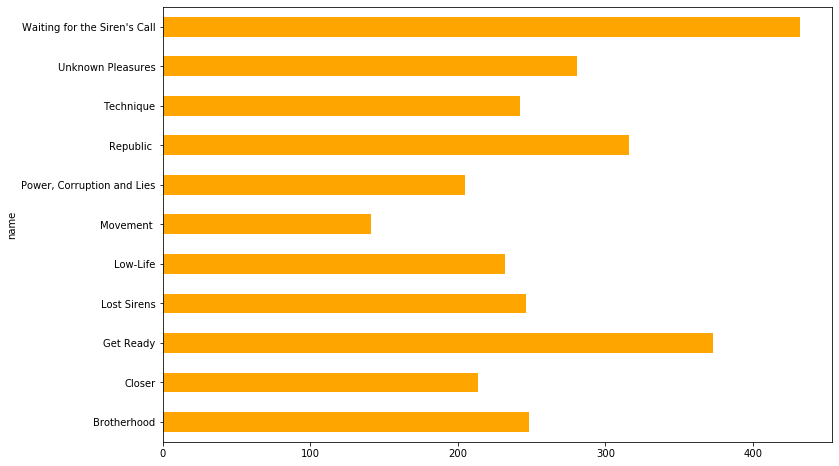

In [19]:
# Baseline of complexity of the artist album data
data.groupby('name').song_lyrics.count().plot(kind='barh', figsize=(12, 8), color='orange')
plt.show();

### Model: `CountVectorize` corpus from NLP
- Column:"corpus" => Lemmatized and stop-word excised version of column: "song_lyrics"

In [20]:
# Begin `Count` vectorization
# REM. This will treat each word independent of one another
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
c_vec = CountVectorizer()
c_vec.fit(data["corpus"])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [22]:
c_vec_counts = c_vec.transform(data["corpus"])

In [23]:
print('sparse matrix shape:', c_vec_counts.shape)
print('nonzero count:', c_vec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * c_vec_counts.nnz / (c_vec_counts.shape[0] * c_vec_counts.shape[1])))

# Credit: [CountVectorizer sklearn example](http://bit.ly/2vK8ntt)

sparse matrix shape: (2930, 1267)
nonzero count: 6741
sparsity: 0.18%


In [24]:
# Top _n_ most-occurring words
word_table = pd.DataFrame(c_vec_counts.toarray(), columns=c_vec.get_feature_names())
word_series = word_table.sum()
word_series = word_series.sort_values(ascending = False)
occ_df = pd.DataFrame({'term': word_series.index, 'count': word_series.values})

occ_df.head(25)

,term,count
0,know,144
1,get,135
2,like,134
3,time,112
4,want,89
5,go,83
6,day,80
7,right,80
8,need,79
9,way,78


In [25]:
# Discover a selected term
occ_df.query("term == 'shock'")

,term,count
251,shock,5


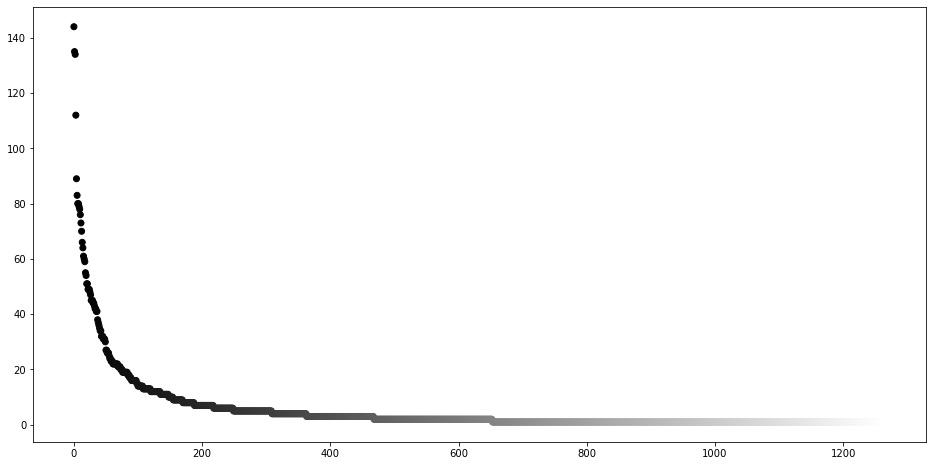

In [26]:
# Plot frequency of terms (single words) appearing in the corpus
plt.figure(figsize=(16,8))
t = np.arange(1267)
plt.scatter(occ_df.index, occ_df['count'], c=t, cmap='gray', marker="o");

### Model: TfidfVectorize corpus from NLP
- Column:"corpus" => Lemmatized and stop-word excised version of column: "song_lyrics"

In [27]:
# Begin `Term frequency-inverse document Frequency` vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
t_vec = TfidfVectorizer()
t_vec_weights = t_vec.fit_transform(data["corpus"])
weights = np.asarray(t_vec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': t_vec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(25)

,term,weight
595,know,0.027552
1116,time,0.020515
447,get,0.019750
625,like,0.019480
1199,want,0.018713
884,right,0.014905
708,need,0.014674
459,go,0.014662
1211,way,0.014642
246,day,0.014249


In [29]:
# Discover a selected term
weights_df.query("term == 'soul'")

,term,weight
1017,soul,0.002733


#### Continue from TfdiF to an LDA Model

In [30]:
# LDA, Default with 10 components

tf = t_vec.fit_transform(data["corpus"].values.tolist())
tf_words = t_vec.get_feature_names()

# The "LDA"
from sklearn.decomposition import LatentDirichletAllocation
lda_10 = LatentDirichletAllocation(n_components=10, 
                                learning_method='batch', random_state=42)
lda_10.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [31]:
# LDA, Default with 6 components

#tf = t_vec.fit_transform(data["corpus"].values.tolist())
#tf_words = t_vec.get_feature_names()

# The "LDA", redux
from sklearn.decomposition import LatentDirichletAllocation
lda_6 = LatentDirichletAllocation(n_components=6, 
                                learning_method='batch', random_state=42)
lda_6.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=6, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

#### Perform LDA visualizations

In [32]:
#! pip install pyldavis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

#### Visualization with 10 Topics

In [33]:
pyLDAvis.sklearn.prepare(lda_10, tf, c_vec)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.235324 -0.008356       1        1  10.985576
7      0.108760 -0.163221       2        1  10.725640
6     -0.024416 -0.213661       3        1  10.600765
2      0.019637  0.032896       4        1  10.519355
0      0.091236 -0.001494       5        1  10.086164
5      0.052030  0.158877       6        1  10.045735
1     -0.156221  0.059457       7        1   9.933686
8      0.114481  0.103272       8        1   9.789201
9      0.053690  0.000359       9        1   9.176038
3     -0.023874  0.031871      10        1   8.137841, topic_info=     Category       Freq   Term      Total  loglift  logprob
595   Default  60.000000   know  60.000000  30.0000  30.0000
1199  Default  41.000000   want  41.000000  29.0000  29.0000
447   Default  44.000000    get  44.000000  28.0000  28.0000
640   Default  26.000000   look  26.000000  27.0000  27.0000
1101  Default  26.000000  think  26.000000  26.0000  26.0000
...       ...        ...    ...        ...      ...      ...
1116  Topic10   4.333216   time  46.789337   0.1293  -4.3643
625   Topic10   4.062785   like  45.008130   0.1037  -4.4287
647   Topic10   3.089810   love  28.201567   0.2974  -4.7025
620   Topic10   2.959332   life  27.185179   0.2909  -4.7456
1229  Topic10   2.081877   will  13.550290   0.6355  -5.0973

[453 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
4         2  0.714014     accuse
16        4  0.825616     afford
17        3  0.908681     afraid
21        7  0.828810        ago
24        3  0.462043      alibi
...     ...       ...        ...
1259      7  0.395516       year
1261      6  0.928268        yes
1262      3  0.788667  yesterday
1263      5  0.875404      young
1263     10  0.087540      young

[546 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 7, 3, 1, 6, 2, 9, 10, 4])

#### Visualization with 6 Topics

In [34]:
pyLDAvis.sklearn.prepare(lda_6, tf, c_vec)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.181217 -0.152120       1        1  18.457200
5      0.079132  0.183847       2        1  17.410595
4     -0.169141 -0.120237       3        1  16.752018
1     -0.100945  0.036198       4        1  16.254941
2      0.050156 -0.017114       5        1  16.075069
3     -0.040419  0.069425       6        1  15.050177, topic_info=     Category       Freq   Term      Total  loglift  logprob
595   Default  62.000000   know  62.000000  30.0000  30.0000
1199  Default  43.000000   want  43.000000  29.0000  29.0000
884   Default  33.000000  right  33.000000  28.0000  28.0000
708   Default  33.000000   need  33.000000  27.0000  27.0000
640   Default  26.000000   look  26.000000  26.0000  26.0000
...       ...        ...    ...        ...      ...      ...
625    Topic6   5.805909   like  45.131340  -0.1569  -4.6866
647    Topic6   4.464370   love  28.498978   0.0400  -4.9493
1116   Topic6   4.054000   time  47.037080  -0.5575  -5.0457
246    Topic6   3.830105    day  32.316813  -0.2389  -5.1025
447    Topic6   3.853732    get  44.875659  -0.5611  -5.0964

[307 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
4         5  0.697027     accuse
17        4  0.885497     afraid
21        4  0.821168        ago
25        6  0.639887      alive
28        1  0.938847    alright
...     ...       ...        ...
1261      2  0.947311        yes
1262      5  0.759934  yesterday
1263      1  0.705742      young
1263      5  0.264653      young
1263      6  0.088218      young

[366 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 5, 2, 3, 4])

---

### Prepare Modeling on Test Train split on Album, Lyrics

In [35]:
# Get list of albums
uniqs = data['name'].unique().tolist()

In [36]:
# Establish a numeric mapping to each album
df_map = pd.DataFrame({'name': uniqs,
                       'mapping' : list(range(len(uniqs)))
                        })

In [37]:
# Combine
data = pd.merge(data, df_map, how='left', on='name')

In [38]:
# Select y, X
y = pd.Series(data['mapping'])
X = pd.DataFrame(data['song_lyrics'])

In [76]:
# Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, \
y_train, y_test = train_test_split(X, y,
                                   test_size=.33,
                                   random_state=42)

In [77]:
# Check
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((1963, 1), (1963,))

((967, 1), (967,))

#### Model TfidF and Multinomial Bayes and Score

In [78]:
#from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(sublinear_tf=True, 
                     norm='l2',
                     encoding='latin-1',
                     ngram_range=(1, 1),
                     stop_words='english',     
                    )

In [154]:
xt_vec = tf.fit_transform(X_train['song_lyrics'])
xv_vec = tf.transform(X_test['song_lyrics'])
# qqq
features = tf.fit_transform(data['song_lyrics']).toarray()
labels = data['mapping']
# t_labels = y_train
# v_labels = y_test

In [81]:
from sklearn.naive_bayes import MultinomialNB
m = MultinomialNB()

In [82]:
m.fit(xt_vec, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [83]:
m.score(xt_vec, y_train)

0.6367804381049414

In [84]:
m.score(xv_vec, y_test)

0.3784901758014478

#### Model LinearRegression and Score

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lr = LinearRegression()

In [87]:
lr.fit(xt_vec, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
lr.score(xt_vec, y_train)

0.731501887427533

In [89]:
lr.fit(xv_vec, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [90]:
lr.score(xv_vec, y_test)

0.7100049773142008

#### Model LinearSVC and Score

In [91]:
from sklearn.svm import LinearSVC

In [156]:
model = LinearSVC()

#from sklearn.model_selection import train_test_split
X_train, X_test, \
y_train, y_test, \
idx_train, idx_test = train_test_split(features, labels,
                                       data.index,
                                       test_size=.33,
                                       random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [158]:
from sklearn.metrics import confusion_matrix
conf_mtx = confusion_matrix(y_test, y_pred)

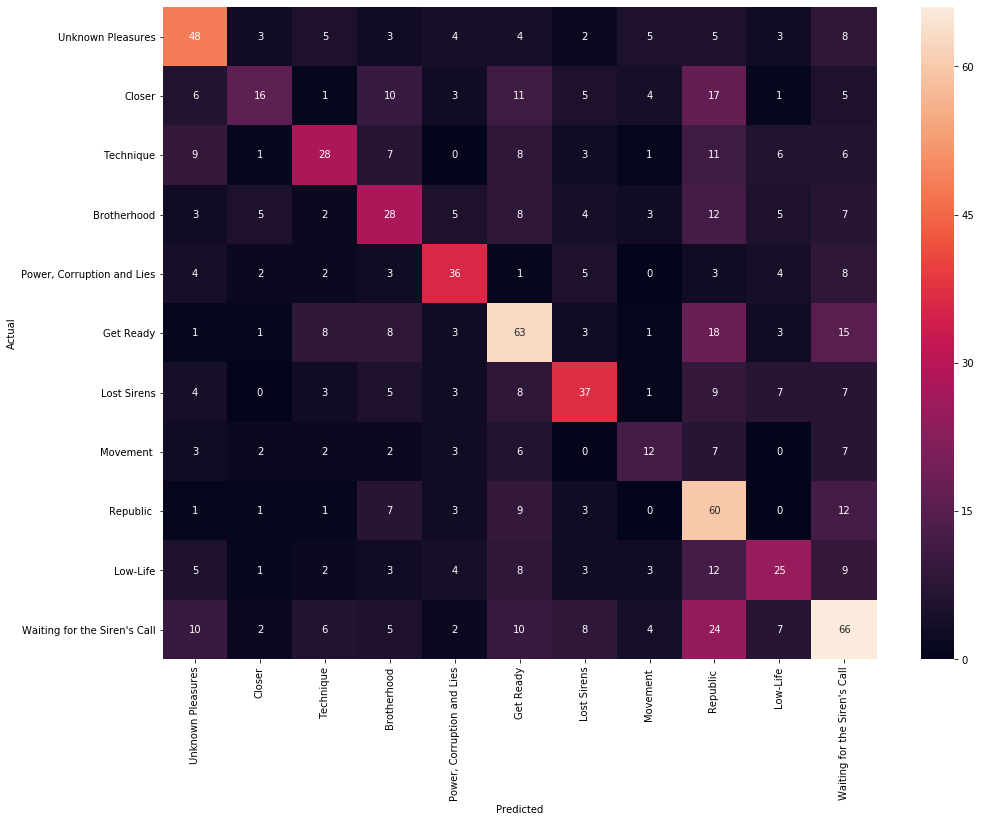

In [159]:
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(conf_mtx, annot=True, fmt='d',
            xticklabels=df_map.name.values, yticklabels=df_map.name.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show();

In [139]:
col = ['name','song_lyrics']
df = data[col]

In [140]:
df['mapping'] = df['name'].factorize()[0]
mapping_df = data[['name', 'mapping']].drop_duplicates().sort_values('mapping')
mapping_id = dict(mapping_df.values)
id_to_map = dict(df_map[['mapping', 'name']].values)

df.shape
len(id_to_map)

(2930, 3)

11

In [161]:
from IPython.display import display

for predicted in df_map.mapping:
  for actual in df_map.mapping:
    if predicted != actual and conf_mtx[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_map[actual], id_to_map[predicted], conf_mtx[actual, predicted]))
      display(df.loc[idx_test[(y_test == actual) & (y_pred == predicted)]][['name', 'song_lyrics']])
      print('')

'Waiting for the Siren's Call' predicted as 'Unknown Pleasures' : 10 examples.


,name,song_lyrics
2710,Waiting for the Siren's Call,You sure know a lot for a girl
2685,Waiting for the Siren's Call,Looking for the one
2750,Waiting for the Siren's Call,To the wall and through the door
2661,Waiting for the Siren's Call,City gates are open wide
2805,Waiting for the Siren's Call,What is it that your eyes see
2803,Waiting for the Siren's Call,You've gotta get back in control
2819,Waiting for the Siren's Call,You've gotta get back in control
2880,Waiting for the Siren's Call,How will you know
2627,Waiting for the Siren's Call,The sun shone through my window pane
2689,Waiting for the Siren's Call,Tried to get it right



'Closer' predicted as 'Brotherhood' : 10 examples.


,name,song_lyrics
410,Closer,Instincts that can still betray us
387,Closer,"Two the same, set free too"
478,Closer,"Pushed to the limit, we dragged ourselves in"
324,Closer,Mother I tried please believe me
414,Closer,You take my place in the showdown
480,Closer,We saw ourselves now as we never had seen
445,Closer,"Just for one moment, thought I'd found my way"
482,Closer,The sorrows we suffered and never were free
361,Closer,The sound from broken homes
290,Closer,Wins a minute to add to his life



'Closer' predicted as 'Get Ready' : 11 examples.


,name,song_lyrics
298,Closer,"This is the way, this is the way"
366,Closer,"Hands him the bag she packed, the tears she tr..."
463,Closer,Stood by the gate at the foot of the garden
423,Closer,Then ripped apart at their roots
367,Closer,A cruel wind that blows down to our lunacy
313,Closer,All the dead wood from jungles and cities on fire
415,Closer,I'll observe with a pitiful eye
464,Closer,Watching them pass like clouds in the sky
315,Closer,Take my hand and I'll show you what was and wi...
297,Closer,"This is the way, this is the way"



'Waiting for the Siren's Call' predicted as 'Get Ready' : 10 examples.


,name,song_lyrics
2899,Waiting for the Siren's Call,And I'll take you there
2578,Waiting for the Siren's Call,I swear it's true
2519,Waiting for the Siren's Call,All shrunk down in a two-foot tube
2531,Waiting for the Siren's Call,I'll never let you go
2832,Waiting for the Siren's Call,I'm coming back for more
2891,Waiting for the Siren's Call,What are you gonna do?
2513,Waiting for the Siren's Call,I'll never let you go
2562,Waiting for the Siren's Call,What do you want me to do
2509,Waiting for the Siren's Call,This time I'll get it right (This time I'll ge...
2921,Waiting for the Siren's Call,And I'll take you there



'Closer' predicted as 'Republic ' : 17 examples.


,name,song_lyrics
420,Closer,An abyss that laughs at creation
402,Closer,Where dogs and vultures eat
485,Closer,Where have they been?
486,Closer,Where have they been?
289,Closer,In arenas he kills for a prize
450,Closer,A valueless collection of hopes and past desires
331,Closer,This is my one lucky prize
393,Closer,"On stranger waves, the lows and highs"
322,Closer,A blindness that touches perfection
291,Closer,But the sickness is drowned by cries for more



'Technique' predicted as 'Republic ' : 11 examples.


,name,song_lyrics
532,Technique,I was blind and I couldn't see
506,Technique,And that's why we could be
535,Technique,And all this emotion
567,Technique,No price or pride would fall before
612,Technique,Then you break your life in two
509,Technique,The past doesn't matter
642,Technique,It's not for me or anyone
718,Technique,Without you there's no tomorrow
655,Technique,"Grow up, children, don't you suffer"
561,Technique,Can't you see?



'Brotherhood' predicted as 'Republic ' : 12 examples.


,name,song_lyrics
961,Brotherhood,When I am with you
755,Brotherhood,Why can't we be ourselves like we were yesterday
817,Brotherhood,Shall we leave our world alone
807,Brotherhood,[Pre-Chorus 2]
802,Brotherhood,"I need you, I need you"
944,Brotherhood,What shall I say
867,Brotherhood,From a stolen pen to a velvet glove
819,Brotherhood,[Pre-Chorus 2]
979,Brotherhood,I still follow you
940,Brotherhood,Or all the problems of our economics



'Get Ready' predicted as 'Republic ' : 18 examples.


,name,song_lyrics
1544,Get Ready,The crew are stranded
1462,Get Ready,I can't get enough of this
1326,Get Ready,Yet it only seems just like yesterday
1398,Get Ready,Don't steal my crown
1497,Get Ready,I can't get enough of this
1486,Get Ready,I can't get enough of this
1361,Get Ready,But I'm seeking sanctuary
1538,Get Ready,My heart is burning
1264,Get Ready,I put my future out of frame
1494,Get Ready,I can't get enough of this



'Low-Life' predicted as 'Republic ' : 12 examples.


,name,song_lyrics
2290,Low-Life,I think I'll go there when it gets seasonable
2359,Low-Life,"My friend, he took his final breath"
2392,Low-Life,Without you I'm on my own
2335,Low-Life,Suggested we go out together
2396,Low-Life,Without you I'm on my own
2303,Low-Life,With our rifles and grenades
2417,Low-Life,"I feel so low, I feel so humble"
2490,Low-Life,What do I get out of this?
2376,Low-Life,Without you I'm on my own
2428,Low-Life,You were me and I was you



'Waiting for the Siren's Call' predicted as 'Republic ' : 24 examples.


,name,song_lyrics
2779,Waiting for the Siren's Call,When you're gone
2615,Waiting for the Siren's Call,You were not real
2505,Waiting for the Siren's Call,And isn't what you wanna do
2834,Waiting for the Siren's Call,J-E-T (J-E-T)
2900,Waiting for the Siren's Call,Wherever you go
2863,Waiting for the Siren's Call,J-E-T (J-E-T)
2607,Waiting for the Siren's Call,You were not real
2637,Waiting for the Siren's Call,Couldn't get a cab at half past five
2916,Waiting for the Siren's Call,Wherever you go
2873,Waiting for the Siren's Call,But you're gone



'Get Ready' predicted as 'Waiting for the Siren's Call' : 15 examples.


,name,song_lyrics
1222,Get Ready,You can drink this magic potion
1505,Get Ready,But all the time when I'm alone
1221,Get Ready,And if you think you'd like to try
1426,Get Ready,Don't wanna have to work
1259,Get Ready,That's just the way it is
1244,Get Ready,I've got a message that I need to send
1436,Get Ready,Don't wanna wake at night
1421,Get Ready,I've got to get back there today
1228,Get Ready,I'm doing my best to confound you
1376,Get Ready,Why don't you run over here and rescue me?



'Republic ' predicted as 'Waiting for the Siren's Call' : 12 examples.


,name,song_lyrics
2102,Republic,I may be wrong but you're missing
2181,Republic,I've not got much to give
2187,Republic,"Look at me, I'm not you"
2103,Republic,There's something wrong you could say
2250,Republic,A master plan just for two
2059,Republic,You've got your finger on the pulse
2119,Republic,It could take all day
2078,Republic,For you to say goodbye
2104,Republic,Ruined in a day
2177,Republic,Almost all the time


In [163]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['name'].unique()))

                              precision    recall  f1-score   support

           Unknown Pleasures       0.51      0.53      0.52        90
                      Closer       0.47      0.20      0.28        79
                   Technique       0.47      0.35      0.40        80
                 Brotherhood       0.35      0.34      0.34        82
  Power, Corruption and Lies       0.55      0.53      0.54        68
                   Get Ready       0.46      0.51      0.48       124
                 Lost Sirens       0.51      0.44      0.47        84
                   Movement        0.35      0.27      0.31        44
                   Republic        0.34      0.62      0.44        97
                    Low-Life       0.41      0.33      0.37        75
Waiting for the Siren's Call       0.44      0.46      0.45       144

                    accuracy                           0.43       967
                   macro avg       0.44      0.42      0.42       967
                we

In [164]:
# R2 from sklearn
metrics.r2_score(y_test, y_pred)

-0.14351813736631902

---

#### Perform a t-SNE plot to explore high dimensional data 

In [311]:
from sklearn.decomposition import TruncatedSVD
X_reduced = TruncatedSVD(n_components=50, random_state=42).fit_transform(t_vec_weights)
# Credit: [T-SNE Dimension Reduction sklearn](http://bit.ly/38zNyyg)

In [312]:
# Create t-distributed Stochastic Neighbor Embedding n-array
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, perplexity=40, verbose=1).fit_transform(X_reduced)
# Credit: [T-SNE Dimension Reduction sklearn](http://bit.ly/38zNyyg)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2930 samples in 0.005s...
[t-SNE] Computed neighbors for 2930 samples in 0.645s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2930
[t-SNE] Computed conditional probabilities for sample 2000 / 2930
[t-SNE] Computed conditional probabilities for sample 2930 / 2930
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.171s
[t-SNE] Iteration 50: error = 77.4691086, gradient norm = 0.0017759 (50 iterations in 0.685s)
[t-SNE] Iteration 100: error = 76.2207031, gradient norm = 0.0056794 (50 iterations in 0.740s)
[t-SNE] Iteration 150: error = 75.9552994, gradient norm = 0.0021882 (50 iterations in 0.684s)
[t-SNE] Iteration 200: error = 75.9185944, gradient norm = 0.0004942 (50 iterations in 0.689s)
[t-SNE] Iteration 250: error = 75.9126282, gradient norm = 0.0003301 (50 iterations in 0.708s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.912628
[t-SNE] Iteration 300: err

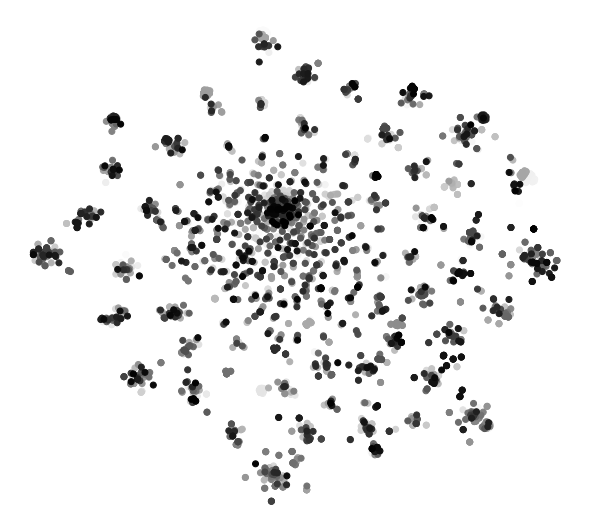

In [313]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(frameon=False)
t = np.arange(2930)
plt.setp(ax, xticks=(), yticks=())
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=t, cmap='binary', marker="o");

---